# Exercise 2
Author: Elias Djupesland
## 1

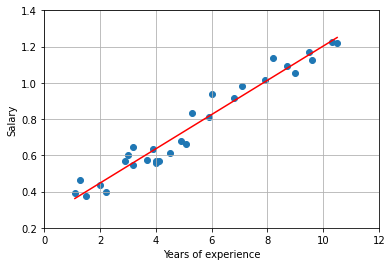

In [118]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from matplotlib.widgets import Slider
from sklearn.linear_model import LinearRegression
df = pd.read_csv ('salary.csv')

df['Salary']=df['Salary']/100000
#df.plot(kind='scatter',x='YearsExperience', y='Salary',color='blue')
X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.xlim(0,12)
plt.ylim(0.2,1.4)
plt.grid()
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.scatter(X, Y)
x_extended = np.linspace(0, 12, 100)
plt.plot(X, Y_pred, color='red')
plt.show()

## 2

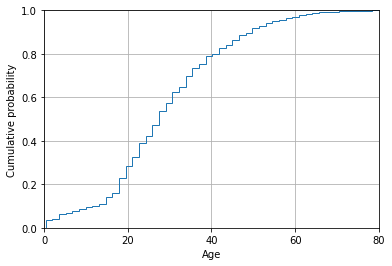

In [119]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read

df = pd.read_csv ('titanic.csv')
df['Age'].hist(bins=50,density=True, histtype='step', cumulative=True, label='Empirical')
plt.xlim(0,80)
plt.xticks([0,20,40,60,80])
plt.ylim(0,1)
plt.xlabel("Age")
plt.ylabel("Cumulative probability")
plt.show()

## 3

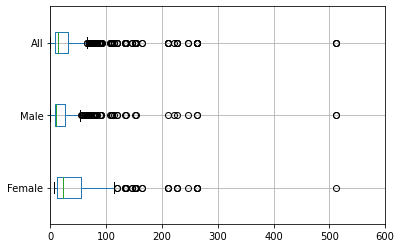

In [120]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read

df = pd.read_csv ('titanic.csv')

all=df['Fare']
male= df[df['Sex'] == 'male']['Fare']
female= df[df['Sex'] == 'female']['Fare']
data = {'Female':  female,
        'Male': male,
        'All': all
        }

df2 = pd.DataFrame (data, columns = ['Female','Male',"All"])
df2.boxplot(vert=False,grid=True)
plt.xlim(0,600)
plt.show()

## 4

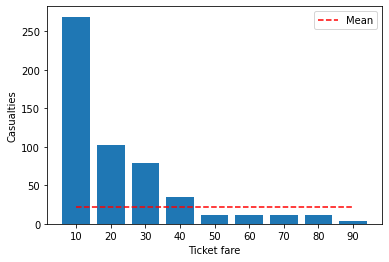

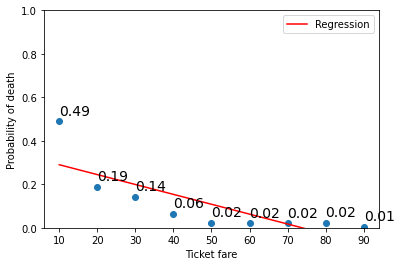

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv ('titanic.csv')

died = df[df['Survived'] == 0]['Fare']

# This variable can be changed to look at different groupings of ticket fare
interval = 10

grouping = [ x for x in range(1,100) if x % interval == 0]
result = []
for index, x in enumerate(grouping):
    if index == 0:
        result.append(df[(df['Survived'] == 0) & (df['Fare'] <= x)]['Fare'].count())
    else:
        result.append(df[(df['Survived'] == 0) & (df['Fare'] > grouping[index-1]) & (df['Fare'] <= x)]['Fare'].count())

y_pos = np.arange(len(grouping))

p = plt.bar(y_pos, result)
plt.xticks(y_pos, grouping)

mean = died.mean()
plt.plot((y_pos[0], y_pos[-1]), (mean, mean), 'r--', label = "Mean")
plt.legend()

plt.ylabel("Casualties")
plt.xlabel("Ticket fare")

plt.show()

plt.figure(2)

count = died.count()

prob_death = [i/count for i in result]

plt.scatter(y_pos, prob_death)
for i, num in enumerate(prob_death):
    plt.annotate(round(num,2), (y_pos[i], prob_death[i]+0.03), fontsize=14)
plt.xticks(y_pos, grouping)
plt.ylim(0,1)

z = np.polyfit(y_pos, prob_death, 1)
p = np.poly1d(z)
plt.plot(y_pos,p(y_pos),"r-", label = "Regression")

plt.ylabel("Probability of death")
plt.xlabel("Ticket fare")
plt.legend()
plt.show()